## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Regression for Housing Price Prediction in Northwestern County 

PROJECT OVERVIEW

BACKGROUND INFORMATION

CHALLANGES

Unavailability of the metrics used to come up with the grading the houses
The market is influenced by external factors such as changing policies and changing economic times.
Insufficient data hence we cannot come up with a recommendation system – We need more data such as available amenities in different areas, security and how these change with different geographical regions 
Impossible to track how houses’ prices have changed over the years, and also how these changes reflect in different geographical regions


SOLUTIONS

CONCLUSION

PROBLEM STATEMENT

GENERAL OBJECTIVES

To develop and implement a ML based solution that leverages data analytics and predictive models to give accurate insights and enable real estate developers to make informed decisions



SPECIFIC OBJECTIVES

To develop a price prediction model  
To identify and select the most relevant features to build the model
To evaluate the accuracy and reliability of machine learning models through rigorous testing and validation processes


DATA UNDERSTANDING

In [59]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [60]:
# Your code here - remember to use markdown cells for comments as well!
#load the data
df = pd.read_csv(r"C:\Users\nimu\Documents\Phaseone\dsc-phase-2-project-v2-3\data\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [61]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

DATA WRANGLING

In [63]:
df.drop(['zipcode', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

In [64]:
#check for missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
lat                 0
long                0
dtype: int64

In [65]:
df['yr_renovated'].eq(0).sum()  #find the sum of the zeros

17011

In [66]:
df.drop(['yr_renovated'], axis=1, inplace=True) # drop the column 

The yr_renovated column has been dropped because even though the rows with data are many,
more thean 85% of them contains zeros instead of actual years making it hard to use

In [67]:
df['view'].unique() 

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [68]:
df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [69]:
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [70]:
df['waterfront'].unique() #check for outliers and do one hot encoding

array([nan, 'NO', 'YES'], dtype=object)

In [71]:
df.dropna(subset=['waterfront', 'view'], inplace=True)

The rows with missing values in waterfront and view were dropped because the have categorical data so we ca

In [72]:
df['view'].replace('NONE', 'NO', inplace=True)

In [73]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NO,Average,7 Average,2170,400.0,1951,47.7210,-122.319
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NO,Average,6 Low Average,770,0.0,1933,47.7379,-122.233
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NO,Very Good,7 Average,1050,910.0,1965,47.5208,-122.393
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NO,Average,8 Good,1680,0.0,1987,47.6168,-122.045
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NO,Average,11 Excellent,3890,1530.0,2001,47.6561,-122.005


In [74]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
dtype: int64

In [75]:
df['date'] = pd.to_datetime(df['date']) 

In [76]:
df.sort_values(by='date', ascending=False, inplace=True)

df.drop_duplicates(subset='id', keep='first', inplace=True)

df.sort_index(inplace=True)
print(df)

               id       date      price  bedrooms  bathrooms  sqft_living  \
1      6414100192 2014-12-09   538000.0         3       2.25         2570   
2      5631500400 2015-02-25   180000.0         2       1.00          770   
3      2487200875 2014-12-09   604000.0         4       3.00         1960   
4      1954400510 2015-02-18   510000.0         3       2.00         1680   
5      7237550310 2014-05-12  1230000.0         4       4.50         5420   
...           ...        ...        ...       ...        ...          ...   
21591  2997800021 2015-02-19   475000.0         3       2.50         1310   
21592   263000018 2014-05-21   360000.0         3       2.50         1530   
21593  6600060120 2015-02-23   400000.0         4       2.50         2310   
21594  1523300141 2014-06-23   402101.0         2       0.75         1020   
21596  1523300157 2014-10-15   325000.0         2       0.75         1020   

       sqft_lot  floors waterfront view  condition          grade  sqft_abo

In [77]:
duplicates = df[df['id'].duplicated()]

EDA

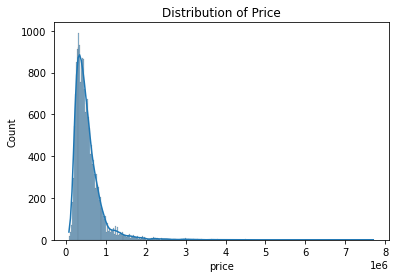

In [78]:
import seaborn as sns
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

Most houses are priced around a half million to a million dollars,
while the most expensive houses imply the order of two million dollars and more

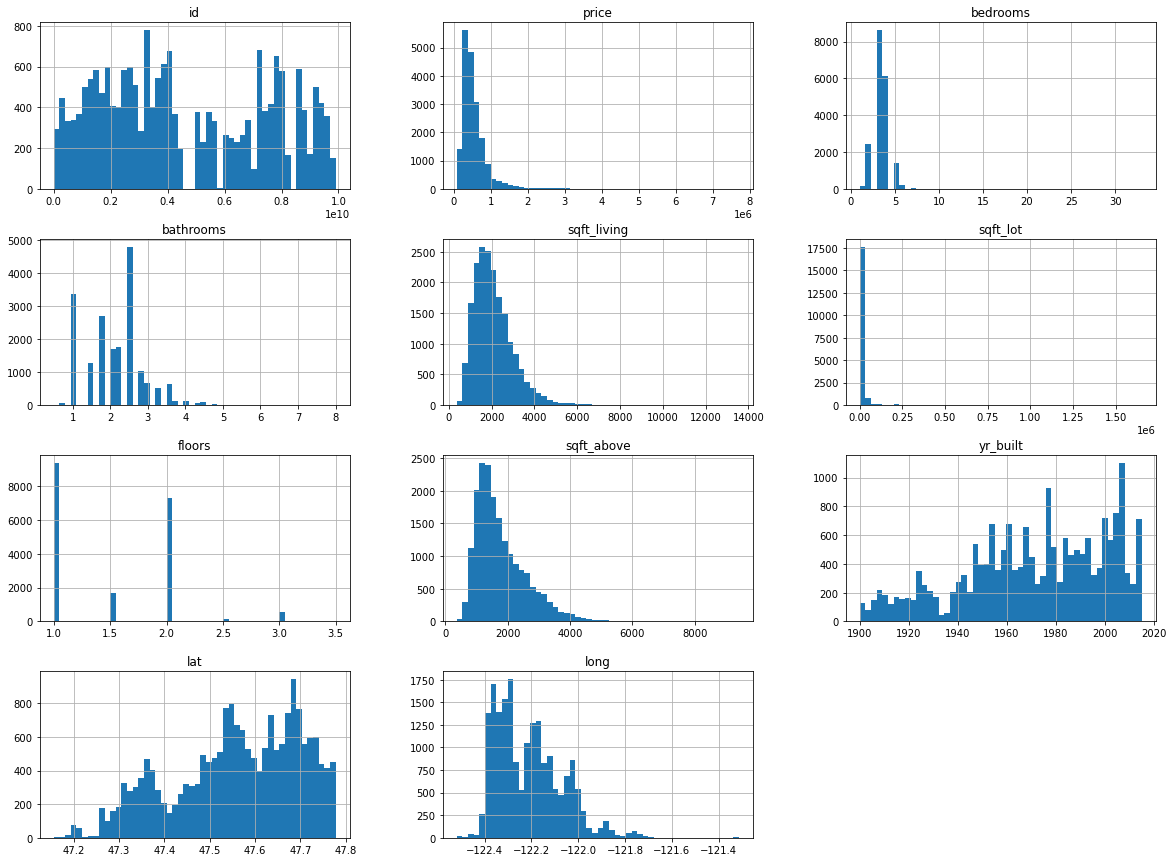

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

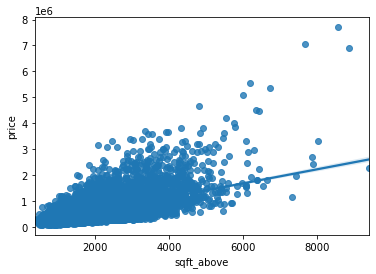

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(15, 8))
sns.regplot(x='sqft_above', y='price', data=df)

In [81]:
view_mapping = {'EXCELLENT':4, 'GOOD':3, 'AVERAGE':2, 'FAIR':1, 'NO':0}
df.replace(view_mapping, inplace=True)

In [82]:
view_mapping = {'YES':1, 'NO':0}
df.replace(view_mapping, inplace=True)

In [83]:
view_mapping = {'Average':3, 'Very Good':5, 'Good':4, 'Poor':1, 'Fair':2}
df.replace(view_mapping, inplace=True)

In [84]:
df['grade_int'] = df['grade'].str.extract(r'(\d+)').astype(int)
column_drop = 'grade'
df = df.drop(column_drop, axis=1)

In [85]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,lat,long,grade_int
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400.0,1951,47.7210,-122.319,7
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0.0,1933,47.7379,-122.233,6
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910.0,1965,47.5208,-122.393,7
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0.0,1987,47.6168,-122.045,8
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,3,3890,1530.0,2001,47.6561,-122.005,11


In [86]:
df['waterfront'].unique()

array([0, 1], dtype=int64)

In [87]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,yr_built,lat,long,grade_int
id,1.000000,-0.019219,0.002728,0.006519,-0.012911,-0.133958,0.017828,-0.004880,0.014068,-0.022813,-0.012369,0.022633,-0.006524,0.018949,0.006593
price,-0.019219,1.000000,0.309329,0.526036,0.703850,0.086395,0.256893,0.271527,0.395255,0.035922,0.608692,0.050753,0.305905,0.019495,0.666696
bedrooms,0.002728,0.309329,1.000000,0.516747,0.578524,0.029797,0.181755,-0.004183,0.083868,0.024352,0.480910,0.156668,-0.013258,0.131794,0.360649
bathrooms,0.006519,0.526036,0.516747,1.000000,0.755730,0.085276,0.505359,0.064609,0.185797,-0.129021,0.687386,0.506215,0.024612,0.222399,0.666311
sqft_living,-0.012911,0.703850,0.578524,0.755730,1.000000,0.172888,0.355893,0.107508,0.285337,-0.059540,0.877730,0.315741,0.052498,0.238614,0.763484
sqft_lot,-0.133958,0.086395,0.029797,0.085276,0.172888,1.000000,-0.008036,0.023128,0.071214,-0.014176,0.183716,0.055218,-0.085895,0.229976,0.114249
floors,0.017828,0.256893,0.181755,0.505359,0.355893,-0.008036,1.000000,0.021192,0.027781,-0.266144,0.523979,0.489822,0.050587,0.126026,0.457470
waterfront,-0.004880,0.271527,-0.004183,0.064609,0.107508,0.023128,0.021192,1.000000,0.407505,0.017118,0.073470,-0.026910,-0.013013,-0.040344,0.085743
view,0.014068,0.395255,0.083868,0.185797,0.285337,0.071214,0.027781,0.407505,1.000000,0.046807,0.168069,-0.057609,0.009991,-0.078505,0.247601
condition,-0.022813,0.035922,0.024352,-0.129021,-0.059540,-0.014176,-0.266144,0.017118,0.046807,1.000000,-0.158258,-0.364634,-0.019051,-0.106342,-0.147841


<AxesSubplot:>

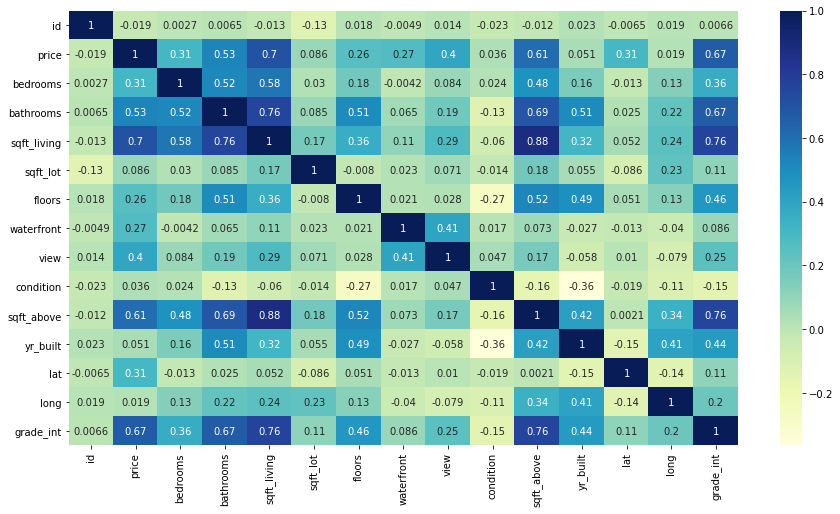

In [88]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap='YlGnBu')

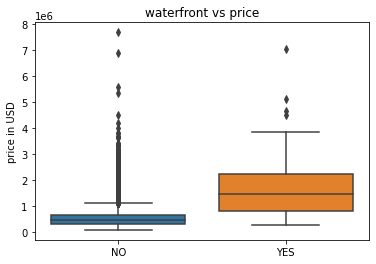

In [89]:
sns.boxplot(x=df['waterfront'], y=df['price'])                                                      
plt.title("waterfront vs price")                          
plt.ylabel("price in USD")                            
plt.xlabel(None)                                      
plt.xticks(np.arange(2), ('NO', 'YES'))         
plt.show()

In [90]:
waterfrontmean = df[df['waterfront'] ==1]['price'].mean()   
nonwaterfrontmean = df[df['waterfront'] ==0]['price'].mean()                            
print(f"mean price for house with waterfront: {round(waterfrontmean, 2)}")          
print (f"mean price for house with no waterfront: {round(nonwaterfrontmean, 2)}")


mean price for house with waterfront: 1692505.86
mean price for house with no waterfront: 533912.48


In [91]:
import statsmodels 
from statsmodels.formula.api import ols
y = df['price']
x = df['sqft_living']
model = ols(formula='price ~ sqft_living', data=df).fit()

In [92]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.868e+04
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:33:01   Log-Likelihood:            -2.6454e+05
No. Observations:               19030   AIC:                         5.291e+05
Df Residuals:                   19028   BIC:                         5.291e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.743e+04   4721.791    -10.046      

In [93]:
# feature engineering
df['bed_bath_ratio'] = df['bedrooms']/df['bathrooms']

In [94]:
def month_of_sale_feature(data):   
    data['month_of_sale'] = pd.DatetimeIndex(data['date']).month   
    return data

In [95]:
df = month_of_sale_feature(df)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,lat,long,grade_int,bed_bath_ratio,month_of_sale
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400.0,1951,47.7210,-122.319,7,1.333333,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0.0,1933,47.7379,-122.233,6,2.000000,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910.0,1965,47.5208,-122.393,7,1.333333,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0.0,1987,47.6168,-122.045,8,1.500000,2
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,3,3890,1530.0,2001,47.6561,-122.005,11,0.888889,5


In [96]:
def quarter(month):  
    if 1<=month<=3:                                
        quarter = 'Q1'
    elif 4 <= month <= 6:     
        quarter  = 'Q2'          
    elif 7 <= month <= 9:        
         quarter = 'Q3'        
    else:            
        quarter = 'Q4'  
        
    return quarter
     

In [97]:
df['quarter_of_sale'] = df['month_of_sale'].apply(quarter)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,lat,long,grade_int,bed_bath_ratio,month_of_sale,quarter_of_sale
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400.0,1951,47.7210,-122.319,7,1.333333,12,Q4
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0.0,1933,47.7379,-122.233,6,2.000000,2,Q1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910.0,1965,47.5208,-122.393,7,1.333333,12,Q4
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0.0,1987,47.6168,-122.045,8,1.500000,2,Q1
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,3,3890,1530.0,2001,47.6561,-122.005,11,0.888889,5,Q2


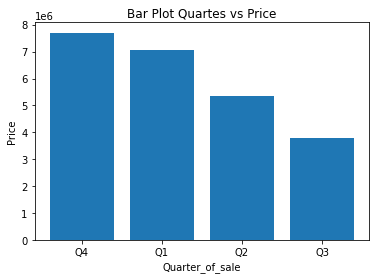

In [98]:
categories = df['quarter_of_sale']
values = df['price']

# # Create a bar plot
# plt.figure(figsize=(15,7)) #Set the figure size
# plt.bar(categories, values, color='skyblue')

sorted_data = sorted(zip(categories, values), key=lambda x: x[1], reverse=True)
genres, values = zip(*sorted_data)

# Create the bar graph
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Quarter_of_sale')
plt.ylabel('Price')
plt.title('Bar Plot Quartes vs Price')


# Display the bar plot
plt.show()

In [99]:
import statsmodels 
from statsmodels.formula.api import ols
y = df['price']
# x = df['sqft_living', 'bathrooms', 'sqft_above', 'bedrooms']
model = ols(formula='price ~ sqft_living + view + grade_int + condition + yr_built + lat + bed_bath_ratio + month_of_sale', data=df).fit()

In [100]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     4822.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:33:34   Log-Likelihood:            -2.6050e+05
No. Observations:               19030   AIC:                         5.210e+05
Df Residuals:                   19021   BIC:                         5.211e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.242e+07      6e+05    -37.

In [101]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 3806
number of training samples: 15224
